# Automated Customers Review Project

## Executive Summary

This business case outlines the development of an NLP model to automate the processing of customer feedback for a retail company.

The goal is to evaluate how a traditional ML solutions (NaiveBayes, SVM, RandomForest, etc) compares against a Deep Learning solution (e.g, a Transformer from HuggingFace) when trying to analyse a user review, in terms of its score (positive, negative or neutral).

## Problem Statement

The company receives thousands of text reviews every month, making it challenging to manually categorize and analyze, and visualize them. An automated system can save time, reduce costs, and provide real-time insights into customer sentiment.
Automatically classyfing a review as positive, negative or neutral is important, as often:
- Users don't leave a score, along with their review
- Different users cannot be compared (for one user, a 4 might be great, for another user a 4 means "not a 5" and it is actually bad)

## Project goals

- The ML/AI system should be able to run classification of customers' reviews (the textual content of the reviews) into positive, neutral, or negative.
- You should be able to compare which solution yeilds better results:
  - One that reads the text with a Language Model and classifies into "Positive", "Negative" or "Neutral"
  - One that transforms reviews into tabular data and classifies them using traditional Machine Learning techniques

## Data Details
The publicly available and downsized dataset of Amazon customer reviews from their online marketplace was used and can be found [here](https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/data)

In order to do this, you should transform all the scores with the following logic:
- Scores of 1,2 or 3: Negative
- Scores of 4: Neutral
- Scores of 5: Positive

## Data Preprocessing

#### Data Cleaning

We begin by downloading the dataset from Kaggle, putting it in a dataframe, and then exploring the data

In [1]:
import kagglehub
from pathlib import Path
import os

try:
  path0
except:
  # Download latest version
  path0 = kagglehub.dataset_download("datafiniti/consumer-reviews-of-amazon-products")

print("Path to dataset files:", path0)
path = os.path.join(path0, '1429_1.csv')

print("Path to csv:", path)

100%|██████████| 16.3M/16.3M [00:01<00:00, 16.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/datafiniti/consumer-reviews-of-amazon-products/versions/5
Path to csv: /root/.cache/kagglehub/datasets/datafiniti/consumer-reviews-of-amazon-products/versions/5/1429_1.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path, low_memory=False)
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


Here we are checking the data types of the columns and the number of missing values in each column

In [ ]:
display(df.info())
print()

null_counts = df.isnull().sum()

# Print the null counts for each column
for column, count in null_counts.items():
    if count > 0:  # Only print columns that have nulls
        print(f"{column:<20} has {count:<7} null values.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

None


name                 has 6760    null values.
asins                has 2       null values.
reviews.date         has 39      null values.
reviews.dateAdded    has 10621   null values.
reviews.didPurchase  has 34659   null values.
reviews.doRecommend  has 594     null values.
reviews.id           has 34659   null values.
reviews.numHelpful   has 529     null values.
reviews.rating       has 33      null values.
reviews.text         has 1       null values.
reviews.title        has 6       null values.
reviews.userCity     has 34660   null values.
reviews.userProvince has 34660   null values.
reviews.username     has 7       null values.


We observe that there are many columns with null values. We will begin by removing the ones that are mostly null. Then we will decide what to do with the others

In [ ]:
# remove columns with more that 30000 missing values
df = df.dropna(thresh=df.shape[0]*0.5, axis=1)
df.info()
print()
null_counts = df.isnull().sum()

# Print the null counts for each column
for column, count in null_counts.items():
    if count > 0:  # Only print columns that have nulls
        print(f"{column:<20} has {count:<7} null values.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   34660 non-null  object 
 1   name                 27900 non-null  object 
 2   asins                34658 non-null  object 
 3   brand                34660 non-null  object 
 4   categories           34660 non-null  object 
 5   keys                 34660 non-null  object 
 6   manufacturer         34660 non-null  object 
 7   reviews.date         34621 non-null  object 
 8   reviews.dateAdded    24039 non-null  object 
 9   reviews.dateSeen     34660 non-null  object 
 10  reviews.doRecommend  34066 non-null  object 
 11  reviews.numHelpful   34131 non-null  float64
 12  reviews.rating       34627 non-null  float64
 13  reviews.sourceURLs   34660 non-null  object 
 14  reviews.text         34659 non-null  object 
 15  reviews.title        34654 non-null 

Since we will be dealing with the reviews, we will drop the rest of the columns and just leave the `title`, `text`, and `rating`. Then we will merge the title and the text, and transform the ratings to just three values: negative (1-3), neutral (4), or positive (5). Since we need the labels for at least the training, we will also remove the rows without labels (just 33 reviews).

In [3]:
# select only the columns that are useful for the analysis (title, reviews, and ratings). also drop the rows with missing ratings
reviews = df[['reviews.text', 'reviews.title', 'reviews.rating']]
reviews = reviews.dropna(subset=['reviews.rating'])
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34627 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34626 non-null  object 
 1   reviews.title   34621 non-null  object 
 2   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


Merging the title and the text, we will have a new column called `text` that will contain the text of the review

In [4]:
#Now we merge the titles with the text of the reviews
reviews['text'] = '(' + reviews['reviews.title'] + ') ' + reviews['reviews.text']

# and map ratings to negative (1-3), neutral (4), and positive (5), they are floats...
reviews['rating'] = reviews['reviews.rating'].map({1.0: 'negative', 2.0: 'negative', 3.0: 'negative', 4.0: 'neutral', 5.0: 'positive'})

# drop the other columns
reviews = reviews[['text', 'rating']]

# and drop rows where text is missing
reviews = reviews.dropna(subset=['text'])

reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34620 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    34620 non-null  object
 1   rating  34620 non-null  object
dtypes: object(2)
memory usage: 811.4+ KB


## Transformer Approach (HuggingFace)

Now we will use transformers from HuggingFace to see how it compares to the traditional ML models. We will use the same data, but we will use the transformer to encode the text and then we will use a simple classifier on top of it.

For BERT models, removing usefull punctuation symbols may negatively affect the performance of the model, as well as lowercasing everything. First, we will ensure that the text is as it should

In [26]:
import re
from bs4 import BeautifulSoup
def clean_text2(text):
    # Step 1: Remove inline JavaScript/CSS
    text = re.sub(r'<(script|style).*?>.*?</\1>', '', text, flags=re.DOTALL)

    # Step 2: Remove HTML comments
    text = re.sub(r'<!--.*?-->', '', text, flags=re.DOTALL)

    # Step 3: Remove remaining HTML tags using BeautifulSoup
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text(separator=' ')  # Extract text and separate with spaces

    # Step 4: General regex to remove any encodings like =XX (two hexadecimal digits)
    text = re.sub(r'=[0-9A-Fa-f]{2}', ' ', text)

    # Step 5: Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove prefixed 'b'
    text = text.lstrip('b')

    # Remove any extra spaces again, just to be sure
    text = re.sub(r'\s+', ' ', text)

    return text

reviews_hugging = reviews.copy()
reviews_hugging['text'] = reviews_hugging['text'].apply(clean_text2)
reviews_hugging.head(5)

<ipython-input-26-0ae28d85af6d>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,text,rating
0,(Kindle) This product so far has not disappoin...,positive
1,(very fast) great for beginner or experienced ...,positive
2,(Beginner tablet for our 9 year old son.) Inex...,positive
3,(Good!!!) I've had my Fire HD 8 two weeks now ...,neutral
4,(Fantastic Tablet for kids) I bought this for ...,positive


We will import the necessary libraries

In [ ]:
# sentiment_analysis.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## IF RUNNING ON YOUR LOCAL MACHINE, make sure you are using a virtual environment. `datasets` until 
# now is using fsspec-2024.9.0, and if using torch 2.5.1+cu124, you need fsspec-204.10.0
####################################
try:
  from datasets import Dataset
except:
  !pip install datasets
  from datasets import Dataset
  #################################

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import torch

Here we encode the labels and split the data into training, validation, and testing sets, as well as convert them to HuggingFace datasets.

In [28]:
le = LabelEncoder()
reviews_hugging['encoded_label'] = le.fit_transform(reviews_hugging['rating'])

# Split data
train_df, test_df = train_test_split(reviews_hugging, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Convert to HuggingFace datasets
train_ds = Dataset.from_pandas(train_df[['text', 'encoded_label']])
val_ds = Dataset.from_pandas(val_df[['text', 'encoded_label']])
test_ds = Dataset.from_pandas(test_df[['text', 'encoded_label']])

### BERT base uncased

We begin with the BERT base uncased model. We will use the `AutoModelForSequenceClassification` model from the `transformers` library. 

We also tokenize the text and reformat it.

In [29]:
# [3. Model & Tokenizer] -----------------------------------------------
model_name = "bert-base-uncased"  # For English reviews_hugging
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3,
    id2label={i: label for i, label in enumerate(le.classes_)}
)

# [4. Tokenization] ----------------------------------------------------
def tokenize_fn(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

train_ds = train_ds.map(tokenize_fn, batched=True)
val_ds = val_ds.map(tokenize_fn, batched=True)
test_ds = test_ds.map(tokenize_fn, batched=True)

# Ensure dataset has 'labels' column
train_ds = train_ds.rename_column("encoded_label", "label")
val_ds = val_ds.rename_column("encoded_label", "label")
test_ds = test_ds.rename_column("encoded_label", "label")

# Reformat datasets
train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# Verify dataset format
print(train_ds[0].keys())  # Should show: input_ids, attention_mask, labels

# Set format for PyTorch
# train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "encoded_label"])
# val_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "encoded_label"])
# test_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "encoded_label"])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/22156 [00:00<?, ? examples/s]

Map:   0%|          | 0/5540 [00:00<?, ? examples/s]

Map:   0%|          | 0/6924 [00:00<?, ? examples/s]

dict_keys(['label', 'input_ids', 'attention_mask'])


We also define the compute metrics and the training arguments that will be used for the fine-tuning of the model.

In [30]:
# [5. Training Setup] --------------------------------------------------
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1_macro": f1_score(labels, preds, average="macro")
    }

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=5,
    learning_rate=2e-5,
    per_device_train_batch_size=16,  # Reduced for stability
    per_device_eval_batch_size=32,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    fp16=True,  # Enable mixed precision
    report_to="none"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Here we mount the drive to save the model

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define Google Drive folder path
drive_folder_path = '/content/drive/My Drive/Colab Notebooks/animals10 CNN Project/amazon reviews'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Finally, we create the trainer and evaluate the model with the test set, using the pre-trained model. We also see the classification report and the confusion matrix.


Base Model Test Set Performance without Fine-Tuning:
Accuracy: 0.2382
Macro F1: 0.1325
              precision    recall  f1-score   support

    negative       0.10      0.01      0.01       477
     neutral       0.24      1.00      0.38      1651
    positive       0.67      0.00      0.00      4796

    accuracy                           0.24      6924
   macro avg       0.33      0.33      0.13      6924
weighted avg       0.53      0.24      0.09      6924



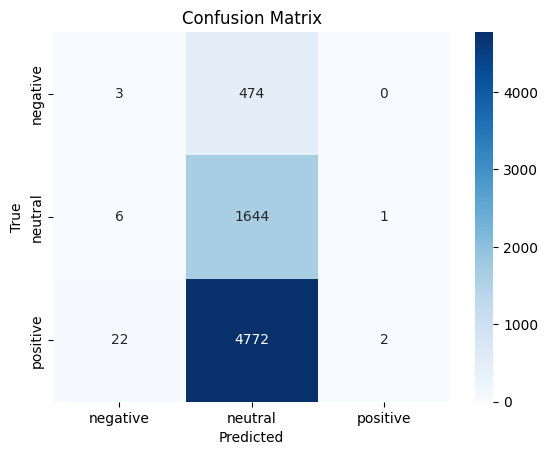

In [31]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics
)

######## Running evaluation an prediction on pre-trained model

# Evaluate on the test set
test_results = trainer.evaluate(test_ds)
print(f"\nBase Model Test Set Performance without Fine-Tuning:")
print(f"Accuracy: {test_results['eval_accuracy']:.4f}")
print(f"Macro F1: {test_results['eval_f1_macro']:.4f}")

# Optionally: Generate predictions
preds = trainer.predict(test_ds)
y_true = preds.label_ids
y_pred = np.argmax(preds.predictions, axis=1)

# Classification report (optional)
print(classification_report(
    y_true,
    y_pred,
    target_names=le.classes_
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
           xticklabels=le.classes_,
           yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### Training the fine-tuned model

Now, we train the model with the training arguments we saw previously. 

In [ ]:

# -----------------------------------------
# Start training with crash protection
try:
    trainer.train()
except KeyboardInterrupt:
    print("\nTraining interrupted! Saving model...")
    trainer.save_model(drive_folder_path + "/interrupted_model")



Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.346000,0.750009,0.759206,0.664333
2,0.229100,0.712989,0.757401,0.646272
3,0.232000,1.091065,0.743682,0.653056
4,0.155500,1.364449,0.729422,0.654220
5,0.092300,1.509172,0.736282,0.647735


After training the model and running the evaluation, we see that the model has a better accuracy than the not fine-tuned model.


Test Set Performance:
Accuracy: 0.7679
Macro F1: 0.6767

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.58      0.67       477
     neutral       0.53      0.46      0.50      1651
    positive       0.83      0.89      0.86      4796

    accuracy                           0.77      6924
   macro avg       0.72      0.64      0.68      6924
weighted avg       0.76      0.77      0.76      6924



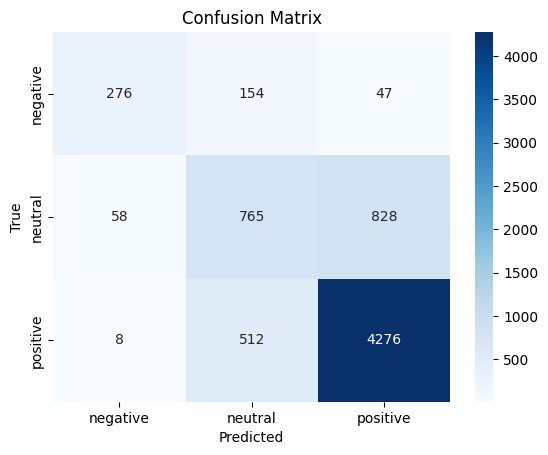

In [ ]:
# Final test evaluation
test_results = trainer.evaluate(test_ds)
print("\nTest Set Performance:")
print(f"Accuracy: {test_results['eval_accuracy']:.4f}")
print(f"Macro F1: {test_results['eval_f1_macro']:.4f}")

# Generate predictions
preds = trainer.predict(test_ds)
y_true = preds.label_ids
y_pred = np.argmax(preds.predictions, axis=1)

# Detailed report
print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=le.classes_
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
           xticklabels=le.classes_,
           yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Save model and predictions
model.save_pretrained("sentiment_model")
tokenizer.save_pretrained("sentiment_model")

pd.DataFrame({
    "text": test_df["text"],
    "true_label": test_df["encoded_label"],
    "pred_label": le.inverse_transform(y_pred)
}).to_csv("predictions.csv", index=False)

# Save to Google Drive
pd.DataFrame({
    "text": test_df["text"],
    "true_label": test_df["encoded_label"],
    "pred_label": le.inverse_transform(y_pred)
}).to_csv(drive_folder_path + "/predictions.csv", index=False)

### BERT base multilingual uncased (sentiment)

In [32]:
#  [3. Model & Tokenizer] -----------------------------------------------
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"  # Example: Switch to RoBERTa 🆕
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3,
    id2label={i: label for i, label in enumerate(le.classes_)},
    ignore_mismatched_sizes=True

)

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([5, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
# [4. Tokenization] ----------------------------------------------------
# Must re-run tokenization with new tokenizer
def tokenize_fn(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

# Convert to HuggingFace datasets
train_ds = Dataset.from_pandas(train_df[['text', 'encoded_label']])
val_ds = Dataset.from_pandas(val_df[['text', 'encoded_label']])
test_ds = Dataset.from_pandas(test_df[['text', 'encoded_label']])

# Re-tokenize
train_ds = train_ds.map(tokenize_fn, batched=True)
val_ds = val_ds.map(tokenize_fn, batched=True)
test_ds = test_ds.map(tokenize_fn, batched=True)

Map:   0%|          | 0/22156 [00:00<?, ? examples/s]

Map:   0%|          | 0/5540 [00:00<?, ? examples/s]

Map:   0%|          | 0/6924 [00:00<?, ? examples/s]

In [34]:
# Ensure label column name
train_ds = train_ds.rename_column("encoded_label", "label")
val_ds = val_ds.rename_column("encoded_label", "label")
test_ds = test_ds.rename_column("encoded_label", "label")

# Set format
train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

print(train_ds[0].keys())  # Should show: input_ids, attention_mask, labels


dict_keys(['label', 'input_ids', 'attention_mask'])


In [35]:
# [5. Training Setup] --------------------------------------------------
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1_macro": f1_score(labels, preds, average="macro")
    }

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=5,
    learning_rate=2e-5,
    per_device_train_batch_size=16,  # Reduced for stability
    per_device_eval_batch_size=32,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    fp16=True,  # Enable mixed precision
    report_to="none"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(



Base Model Test Set Performance without Fine-Tuning:
Accuracy: 0.5630
Macro F1: 0.4717
              precision    recall  f1-score   support

    negative       0.32      0.74      0.44       477
     neutral       0.23      0.28      0.26      1651
    positive       0.81      0.64      0.72      4796

    accuracy                           0.56      6924
   macro avg       0.45      0.55      0.47      6924
weighted avg       0.64      0.56      0.59      6924



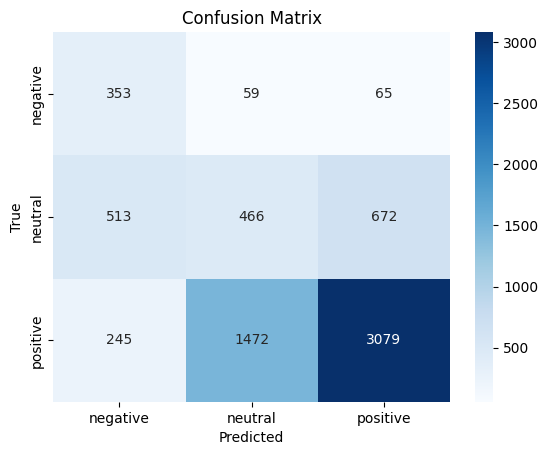

In [36]:
#  --------------------------------------------------------
trainer = Trainer(
    model=model,  # New model loaded here
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics
)

######## Running evaluation an prediction on pre-trained model

# Evaluate on the test set
test_results = trainer.evaluate(test_ds)
print(f"\nBase Model Test Set Performance without Fine-Tuning:")
print(f"Accuracy: {test_results['eval_accuracy']:.4f}")
print(f"Macro F1: {test_results['eval_f1_macro']:.4f}")

# Optionally: Generate predictions
preds = trainer.predict(test_ds)
y_true = preds.label_ids
y_pred = np.argmax(preds.predictions, axis=1)

# Classification report (optional)
print(classification_report(
    y_true,
    y_pred,
    target_names=le.classes_
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
           xticklabels=le.classes_,
           yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### Fine Tuning... (although not that great)

In [ ]:
drive_folder_path = '/content/drive/My Drive/Colab Notebooks/animals10 CNN Project/amazon reviews/bert2-sentiment'

try:
    trainer.train()
except KeyboardInterrupt:
    print("\nTraining interrupted! Saving model...")
    trainer.save_model(drive_folder_path + "/interrupted_model")

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.568100,0.548865,0.771480,0.657577
2,0.503300,0.558965,0.774368,0.672263
3,0.438900,0.597143,0.768051,0.666598
4,0.368300,0.654085,0.765162,0.667313
5,0.287000,0.757214,0.758664,0.667318



Test Set Performance:
Accuracy: 0.7800
Macro F1: 0.6826

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.58      0.68       477
     neutral       0.57      0.45      0.50      1651
    positive       0.83      0.91      0.87      4796

    accuracy                           0.78      6924
   macro avg       0.74      0.65      0.68      6924
weighted avg       0.77      0.78      0.77      6924



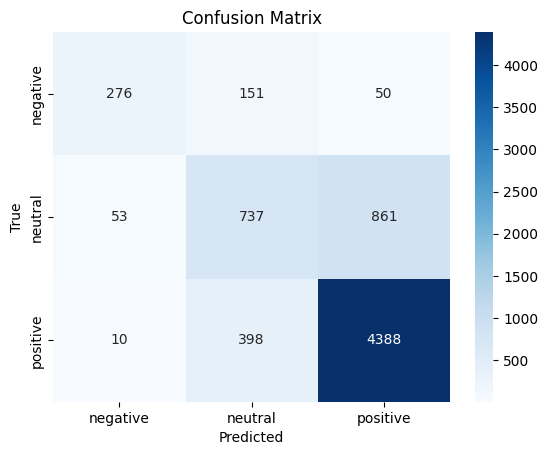

In [ ]:
# Final test evaluation
test_results = trainer.evaluate(test_ds)
print("\nTest Set Performance:")
print(f"Accuracy: {test_results['eval_accuracy']:.4f}")
print(f"Macro F1: {test_results['eval_f1_macro']:.4f}")

# Generate predictions
preds = trainer.predict(test_ds)
y_true = preds.label_ids
y_pred = np.argmax(preds.predictions, axis=1)

# Detailed report
print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=le.classes_
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
           xticklabels=le.classes_,
           yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Save model and predictions
model.save_pretrained(drive_folder_path+"sentiment_model")
tokenizer.save_pretrained(drive_folder_path+"sentiment_model")

pd.DataFrame({
    "text": test_df["text"],
    "true_label": test_df["encoded_label"],
    "pred_label": le.inverse_transform(y_pred)
}).to_csv("predictions bert2.csv", index=False)

# Save to Google Drive
pd.DataFrame({
    "text": test_df["text"],
    "true_label": test_df["encoded_label"],
    "pred_label": le.inverse_transform(y_pred)
}).to_csv(drive_folder_path + "/predictions bert2.csv", index=False)

## Comparing Results

The results of the two transformer models (base and fine tuned)

| Model                                          | Negative Precision | Negative Recall | Negative F1 | Neutral Precision | Neutral Recall | Neutral F1 | Positive Precision | Positive Recall | Positive F1 | Accuracy | Macro-F1 |
|------------------------------------------------|:------------------:|:---------------:|:-------------:|:----------------:|:--------------:|:----------:|:------------------:|:---------------:|:-----------:|:----------:|:----------:|
| bert-base-uncased                              | 0.10               | 0.01            | 0.01        | 0.24              | 1.00           | 0.38       | 0.67               | 0.00            | 0.00        | 0.24     | 0.13     |
| bert-base-uncased fine-tuned                   | 0.81               | 0.58            | 0.67        | 0.53              | 0.46           | 0.50       | 0.83               | 0.89            | 0.86        | 0.77     | 0.68     |
| nlptown/bert-base-multilingual- <br/>uncased-sentiment | 0.32               | 0.74            | 0.44        | 0.23              | 0.28           | 0.26       | 0.81               | 0.64            | 0.72        | 0.56     | 0.47     |
| nlptown/bert-base-multilingual- <br/>uncased-sentiment fine-tuned    | 0.81               | 0.58            | 0.68        | 0.57              | 0.45           | 0.50       | 0.83               | 0.91            | 0.87        | 0.78     | 0.68     |


We can observe that the untuned transformer models did not perform well, but the fine-tuned models performed better. The best model was the fine-tuned `nlptown BERT base uncased model`, with an accuracy of 0.78 and a macro-F1 of 0.68. 

The results were not as great as expected. Results could have been improved by having a more powerful machine that allowed us to train the models quicker and more time to fine-tune the models. 